In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime, timedelta, timezone, date
import logging
import numpy as np
from zoneinfo import ZoneInfo # Required for ET timezone

# Configure logging for the notebook
# This will print logs to the console/notebook output
logging.basicConfig(level=logging.INFO, # Set to INFO for general output, DEBUG for more verbosity
                    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

# Set specific log levels for modules if desired
logging.getLogger('file_io').setLevel(logging.INFO) # Can be DEBUG for more detail
logging.getLogger('polygon_downloader').setLevel(logging.INFO) # Can be DEBUG for more detail
logging.getLogger('universe_builder').setLevel(logging.INFO) # Can be DEBUG for more detail
logging.getLogger('backtester').setLevel(logging.DEBUG) # Can be DEBUG for more detail

# Import your custom classes (assuming they are in the same directory as this notebook)
from file_io import FileIO
from data_downloader import PolygonDataDownloader
from data_manager import DataManager
from universe_builder import UniverseBuilder
from backtester import Backtester

# Define your base data directory
# Make sure this path is accessible and writable by your script
BASE_DATA_DIR = Path("/mnt/nas/price_data/polygon/")
BASE_DATA_DIR.mkdir(exist_ok=True) # Ensure the directory exists
print(f"Using data directory: {BASE_DATA_DIR.resolve()}")

# Define Eastern Time (ET) timezone for consistency, as used in UniverseBuilder
ET = ZoneInfo("America/New_York")

Using data directory: /mnt/nas/price_data/polygon


In [2]:
print("--- Initializing DataManager ---")
dm = DataManager(BASE_DATA_DIR)

print("\n--- Checking/Updating Ticker Lists (Needed for Backtester's internal checks) ---")
# This will download ticker lists if they are missing or older than 24 hours
# Set force_update=True to always download fresh ticker lists
active_tickers, delisted_tickers = dm.get_tickers(force_update=False)

print(f"Active tickers count: {len(active_tickers)}")
print(f"Delisted tickers count: {len(delisted_tickers)}")

if not active_tickers and not delisted_tickers:
    print("WARNING: No tickers found. Please ensure your Polygon API key is valid and run dm.get_tickers(force_update=True) if needed.")
    # You might want to exit or handle this case if no tickers are available
    # exit()

2025-07-03 15:52:20,666 - data_manager - INFO - DataManager initialized. Data directory: /mnt/nas/price_data/polygon


--- Initializing DataManager ---

--- Checking/Updating Ticker Lists (Needed for Backtester's internal checks) ---


2025-07-03 15:52:20,979 - data_downloader - INFO - Active tickers are up-to-date (last updated: 2025-07-03 22:47:04 UTC).
2025-07-03 15:52:20,980 - data_downloader - INFO - Delisted tickers are up-to-date (last updated: 2025-07-03 22:47:05 UTC).
2025-07-03 15:52:20,980 - data_downloader - INFO - Reading ticker lists from local files (no download needed).
2025-07-03 15:52:20,980 - data_downloader - INFO - Read 11840 active and 28705 delisted tickers from local files.


Active tickers count: 11840
Delisted tickers count: 28705


In [3]:
print("\n--- Specifying Universe File for Backtest ---")

# Directly specify the name of your universe file
universe_filename = "universe_30pct_15mil.json"

# Assuming the universe file is saved in the 'universes' subdirectory of your BASE_DATA_DIR
universe_file_path = BASE_DATA_DIR / "universes" / universe_filename

print(f"Attempting to load universe from: {universe_file_path}")

if not universe_file_path.exists():
    print(f"ERROR: Universe file NOT FOUND at {universe_file_path}.")
    print("Please ensure you have already generated this universe file using UniverseBuilder and placed it correctly.")
    # You might want to exit or raise an error here if the universe file is critical
    # exit()



--- Specifying Universe File for Backtest ---
Attempting to load universe from: /mnt/nas/price_data/polygon/universes/universe_30pct_15mil.json


In [15]:
print(total_pnl)

2022-01-04     -59.950000
2022-02-14     -13.641250
2022-02-24      13.366250
2022-03-07    -597.697750
2022-03-08    -330.811150
                 ...     
2025-06-16    5378.163854
2025-06-23    5343.584610
2025-06-24    5469.540610
2025-06-27    5527.100710
2025-06-30    5080.700710
Name: Cumulative PnL, Length: 267, dtype: float64


--- Individual Ticker PnL from 2025-03-01 to 2025-04-03 ---


,ACON,BON,CORT,DGLY,GATE,RNAZ,RSLS,STSS
2025-03-03,-25.7769,0.0000,0.0000,0.000,0.000,0.00000,0.00000,0.0000
2025-03-10,0.0000,0.0000,0.0000,0.000,0.000,0.00000,0.00000,12.7656
2025-03-14,0.0000,8.2775,0.0000,0.000,0.000,0.00000,0.00000,0.0000
2025-03-21,0.0000,0.0000,0.0000,0.000,0.000,-0.53613,0.00000,0.0000
2025-03-31,0.0000,0.0000,-77.7453,0.000,0.000,0.00000,0.00000,0.0000
2025-04-01,0.0000,0.0000,0.0000,0.000,-46.566,0.00000,-601.26255,0.0000
2025-04-02,0.0000,0.0000,0.0000,148.304,0.000,0.00000,0.00000,0.0000


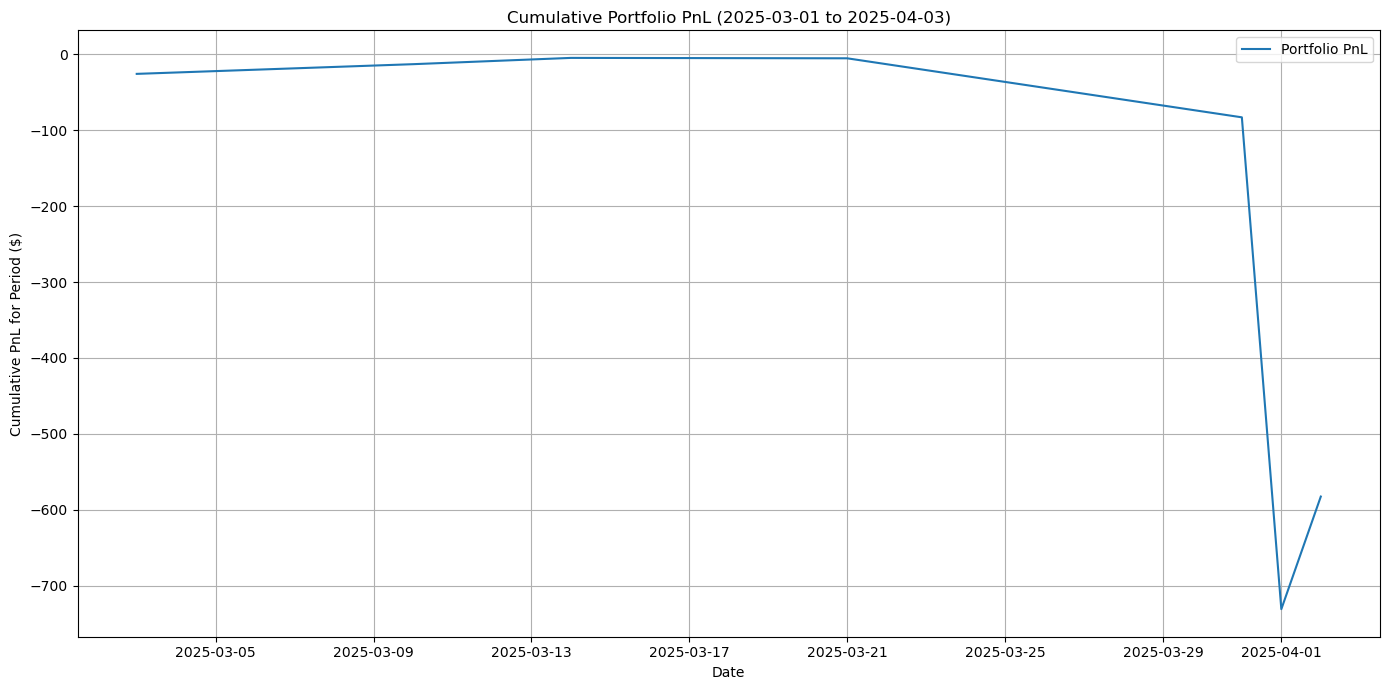

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

# This cell assumes that a backtest has been run and the following variables exist:
# - pnl_df: A pandas DataFrame with daily PnL for each ticker.

# --- Options ---
# Specify the year you want to analyze
target_year = 2025
# --- End of Options ---

# Define the date range
start_date = date(target_year, 3, 1)
end_date = date(target_year, 4, 3)

if 'pnl_df' not in locals() or pnl_df.empty:
    print("\n'pnl_df' not found or is empty. Please run a backtest first.")
else:
    # Filter the DataFrame for the specified date range
    # Corrected line: Compare directly with the index, as it already contains date objects.
    pnl_slice_df = pnl_df[(pnl_df.index >= start_date) & (pnl_df.index <= end_date)]

    if not pnl_slice_df.empty:
        print(f"--- Individual Ticker PnL from {start_date.isoformat()} to {end_date.isoformat()} ---")
        
        # To avoid displaying a massive dataframe, show only columns with non-zero PnL in the period
        pnl_slice_df = pnl_slice_df.loc[:, (pnl_slice_df != 0).any(axis=0)]
        display(pnl_slice_df)

        # Calculate and plot the cumulative PnL for this specific slice
        cumulative_pnl_slice = pnl_slice_df.sum(axis=1).cumsum()
        
        plt.figure(figsize=(14, 7))
        cumulative_pnl_slice.plot(
            title=f"Cumulative Portfolio PnL ({start_date.isoformat()} to {end_date.isoformat()})",
            grid=True,
            legend=True,
            label="Portfolio PnL"
        )
        plt.xlabel("Date")
        plt.ylabel("Cumulative PnL for Period ($)")
        plt.tight_layout()
        plt.show()
        
    else:
        print(f"No trades were found in the specified date range: {start_date.isoformat()} to {end_date.isoformat()}.")




--- Backtest Results Summary ---
Total Cumulative PnL: $5,080.70
Final Account Value: $35,080.70

--- Performance Statistics ---
Sharpe Ratio (Annualized): 2.0040
Annualized Return: 0.1591
Annualized Std Dev: 0.0794
Total Trading Days: 267


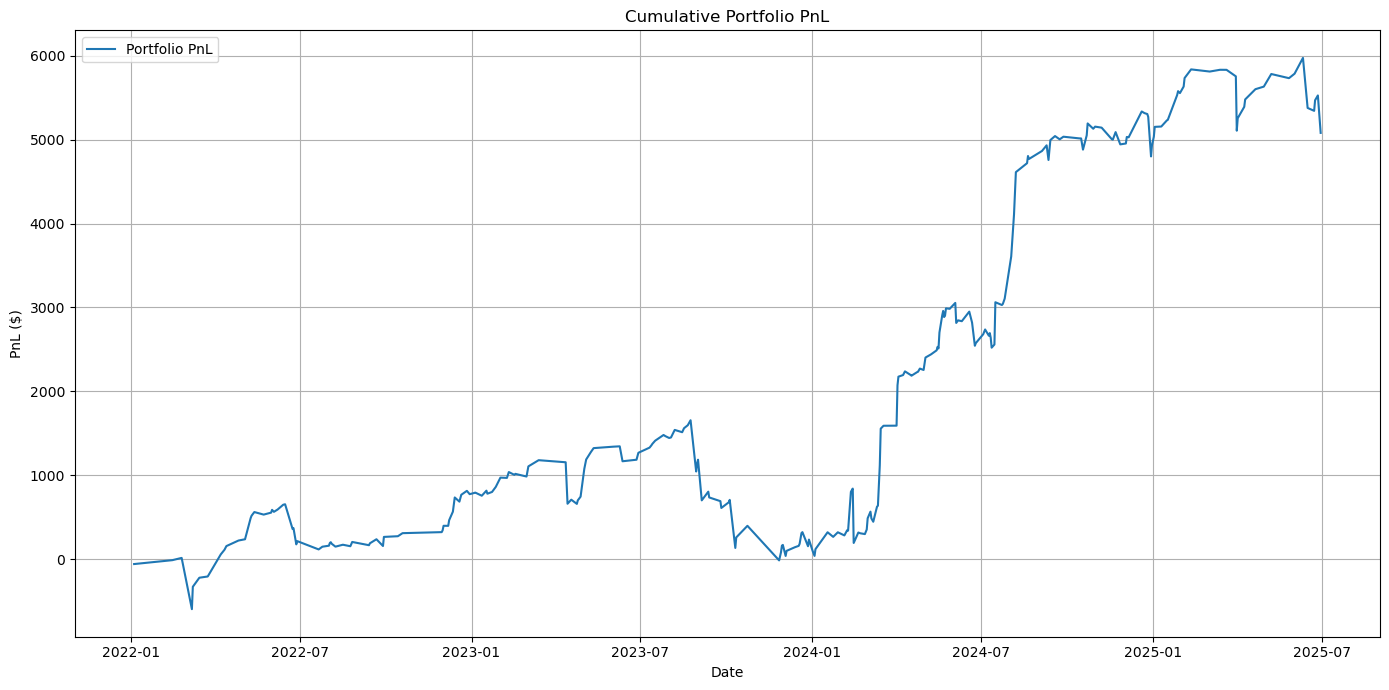

2025-07-03 16:00:00,484 - data_manager - INFO - Getting trade 5minute data for MLGO from 2024-08-25 00:00:00+00:00 to 2024-09-01 23:59:59.999999+00:00...
2025-07-03 16:00:00,494 - file_io - INFO - Successfully read 939 records for MLGO (5minute, trade).
2025-07-03 16:00:00,495 - data_manager - INFO - Retrieved 939 records for MLGO.



--- Overlaying 5-minute data for MLGO from 2024-08-25 to 2024-09-01 ---


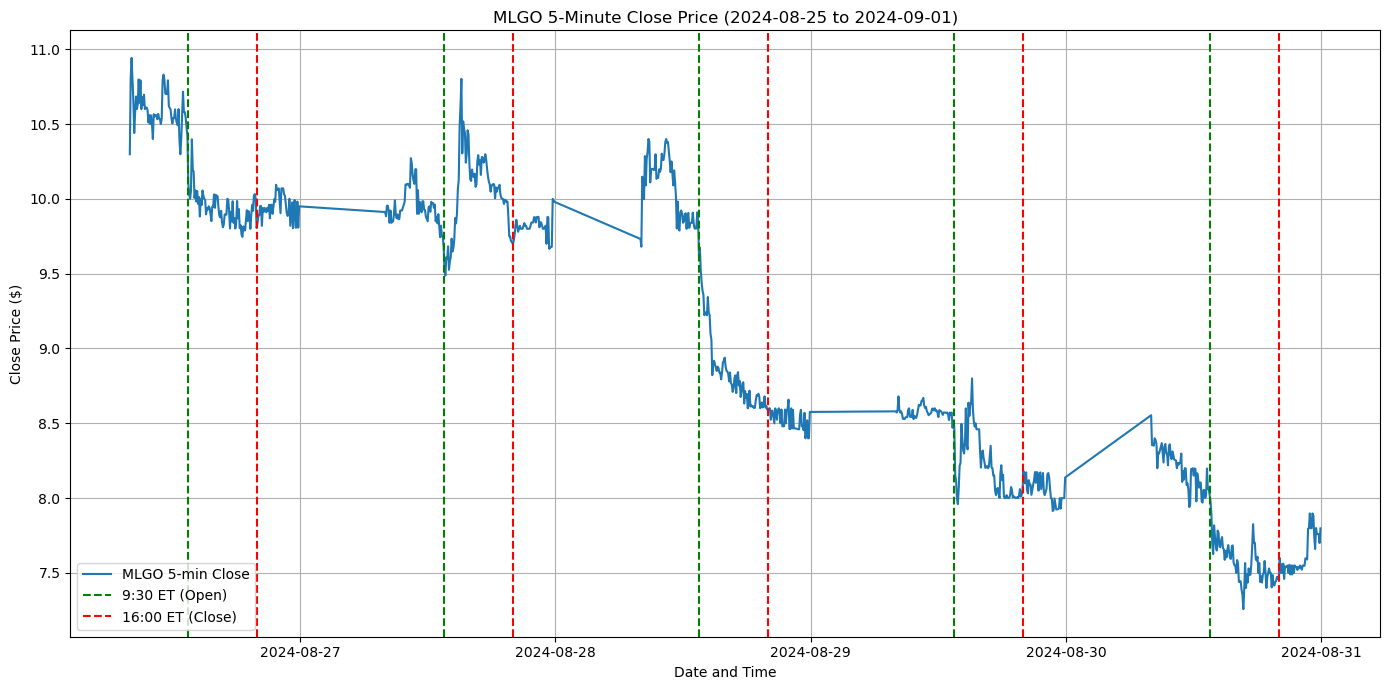

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, date
import pytz

# This cell assumes that a backtest has been run and the following variables exist:
# - total_pnl: A pandas Series with the cumulative portfolio PnL.
# - backtester: The instance of the Backtester class used.
# - dm: An instance of the DataManager class.

# --- Hardcoded Options for Plotting ---
# Specify a stock to overlay on a detailed 5-minute chart
overlay_stock = "MLGO"

# Specify start and end dates to filter the PnL graph.
# Set to None to view the entire backtest period.
# Example: start_date_filter = date(2023, 3, 1)
start_date_filter = None
end_date_filter = None
# --- End of Options ---


# Check if the backtest produced results
if 'total_pnl' not in locals() or total_pnl.empty:
    print("\nNo backtest results to display or plot.")
else:
    print("\n--- Backtest Results Summary ---")
    print(f"Total Cumulative PnL: ${total_pnl.iloc[-1]:,.2f}")
    print(f"Final Account Value: ${backtester.initial_capital + total_pnl.iloc[-1]:,.2f}")

    # Calculate and print performance statistics
    stats = backtester._calculate_statistics(total_pnl)
    print("\n--- Performance Statistics ---")
    for stat, value in stats.items():
        if isinstance(value, float) and not np.isnan(value):
            print(f"{stat}: {value:.4f}")
        else:
            print(f"{stat}: {value}")

    # --- Filter PnL data based on selected dates for plotting ---
    pnl_to_plot = total_pnl.copy()
    if start_date_filter:
        # Corrected line: Compare directly with the index
        pnl_to_plot = pnl_to_plot[pnl_to_plot.index >= start_date_filter]
    if end_date_filter:
        # Corrected line: Compare directly with the index
        pnl_to_plot = pnl_to_plot[pnl_to_plot.index <= end_date_filter]

    # Plot Cumulative Portfolio PnL
    plt.figure(figsize=(14, 7))
    plot_title = "Cumulative Portfolio PnL"
    if start_date_filter or end_date_filter:
        start_str = start_date_filter.isoformat() if start_date_filter else "Start"
        end_str = end_date_filter.isoformat() if end_date_filter else "End"
        plot_title += f" ({start_str} to {end_str})"

    pnl_to_plot.plot(title=plot_title, grid=True, legend=True, label="Portfolio PnL")
    plt.xlabel("Date")
    plt.ylabel("PnL ($)")
    plt.tight_layout()
    plt.show()


    # --- Overlay 5-minute data for a specific stock ---
    # Corrected line: Use the correct variable name
    # first_pnl_date = total_pnl.index.min()
    overlay_end_date = date(2024, 9, 1)
    overlay_start_date = overlay_end_date - timedelta(days=7)

    print(f"\n--- Overlaying 5-minute data for {overlay_stock} from {overlay_start_date} to {overlay_end_date} ---")

    overlay_5min_data = dm.get_data(
        symbol=overlay_stock,
        freq="5minute",
        quote=False,
        start=overlay_start_date,
        end=overlay_end_date
    )

    if not overlay_5min_data.empty:
        plt.figure(figsize=(14, 7))
        plt.plot(overlay_5min_data.index, overlay_5min_data['close'], label=f'{overlay_stock} 5-min Close')
        plt.title(f'{overlay_stock} 5-Minute Close Price ({overlay_start_date} to {overlay_end_date})')
        plt.xlabel('Date and Time')
        plt.ylabel('Close Price ($)')
        plt.grid(True)

        # Add vertical lines for market hours
        est = pytz.timezone('US/Eastern')
        utc = pytz.utc
        unique_dates = pd.to_datetime(overlay_5min_data.index.date).unique()
        
        for trade_date in unique_dates:
            open_time_et = est.localize(pd.Timestamp.combine(trade_date.date(), pd.to_datetime('09:30').time()))
            close_time_et = est.localize(pd.Timestamp.combine(trade_date.date(), pd.to_datetime('16:00').time()))
            
            open_time_utc = open_time_et.astimezone(utc)
            close_time_utc = close_time_et.astimezone(utc)
            
            plt.axvline(x=open_time_utc, color='g', linestyle='--', label='9:30 ET (Open)')
            plt.axvline(x=close_time_utc, color='r', linestyle='--', label='16:00 ET (Close)')

        # Create a legend with unique labels
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"No 5-minute data found for {overlay_stock} in the specified overlay range.")


In [24]:
for trade in trade_log:
    print(trade)

{'symbol': 'MLGO', 'trade_date': datetime.date(2024, 6, 4), 'pnl': -238.67999999999998, 'pre_trade_volatility': 0.010903167309813479, 'pre_market_volume': 1393343.55}
{'symbol': 'MLGO', 'trade_date': datetime.date(2024, 6, 24), 'pnl': -336.256, 'pre_trade_volatility': 0.014096659867686205, 'pre_market_volume': 442156.14999999997}
{'symbol': 'MLGO', 'trade_date': datetime.date(2024, 12, 31), 'pnl': 118.12100000000001, 'pre_trade_volatility': 0.01896391624651276, 'pre_market_volume': 6456258.0}
{'symbol': 'MLGO', 'trade_date': datetime.date(2025, 1, 27), 'pnl': 27.251400000000025, 'pre_trade_volatility': 0.009804061594280059, 'pre_market_volume': 39137313.0}
{'symbol': 'MLGO', 'trade_date': datetime.date(2025, 2, 21), 'pnl': -615.5341649999999, 'pre_trade_volatility': 0.022541909802558373, 'pre_market_volume': 61134295.0}
{'symbol': 'MLGO', 'trade_date': datetime.date(2025, 3, 24), 'pnl': -615.7836, 'pre_trade_volatility': 0.016654509627377568, 'pre_market_volume': 28027893.0}
{'symbol':

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px # Import Plotly
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.ticker import FuncFormatter

# This cell assumes you have run the backtester and have the results:
# total_pnl_series, pnl_df, full_trade_log = backtester.run_backtest(...)

# Convert the detailed trade log into a DataFrame for easy analysis
trade_log_df = pd.DataFrame(full_trade_log)

if not trade_log_df.empty:
    print(f"Analysis of {len(trade_log_df)} total trades.")

    # --- Prepare data for plotting by removing NaN/zero values ---
    plot_df = trade_log_df.dropna(subset=['pre_trade_volatility', 'pre_market_volume'])
    plot_df = plot_df[(plot_df['pre_trade_volatility'] > 0) & (plot_df['pre_market_volume'] > 0)].copy()
    
    # Add a 'result' column for color-coding in the plot
    plot_df['result'] = np.where(plot_df['pnl'] > 0, 'Profit', 'Loss')


    # --- Interactive 3D Scatter Plot using Plotly ---
    fig = px.scatter_3d(
        plot_df,
        x='pre_trade_volatility',
        y='pre_market_volume',
        z='pnl',
        color='result',
        color_discrete_map={'Profit': 'green', 'Loss': 'red'},
        log_x=True,
        log_y=True,
        title='Interactive 3D View of PnL vs. Pre-Trade Volatility and Volume',
        labels={
            "pre_trade_volatility": "Pre-Trade Volatility",
            "pre_market_volume": "Pre-Market Volume",
            "pnl": "Individual Trade PnL ($)"
        },
        hover_data=['symbol', 'trade_date'] # Show ticker and date on hover
    )

    fig.update_layout(
        margin=dict(l=0, r=0, b=0, t=40),
        scene=dict(
            xaxis=dict(title='Pre-Trade Volatility (Log Scale)'),
            yaxis=dict(title='Pre-Market Volume (Log Scale)'),
            zaxis=dict(title='Individual Trade PnL ($)')
        )
    )
    fig.show()


    # --- 2D Scatter Plots (from previous request) ---
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=plot_df, x='pre_trade_volatility', y='pnl', alpha=0.5)
    plt.xscale('log')
    plt.title('Trade PnL vs. Pre-Trade Volatility (Log Scale)')
    plt.grid(True, which="both", ls="--")
    plt.axhline(0, color='r', linestyle='--')
    plt.show()

    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=plot_df, x='pre_market_volume', y='pnl', alpha=0.5)
    plt.xscale('log')
    plt.title('Trade PnL vs. Pre-Market Volume (Log Scale)')
    plt.grid(True, which="both", ls="--")
    plt.axhline(0, color='r', linestyle='--')
    plt.gca().get_xaxis().set_major_formatter(
        plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
    )
    plt.show()


    # --- Binned Analysis Table ---
    if plot_df['pre_trade_volatility'].nunique() > 5:
        plot_df['vol_quintile'] = pd.qcut(plot_df['pre_trade_volatility'].rank(method='first'), 5, labels=False)
        
        binned_analysis = plot_df.groupby('vol_quintile').agg(
            total_pnl=('pnl', 'sum'),
            average_pnl=('pnl', 'mean'),
            trade_count=('pnl', 'count')
        ).reset_index()
        
        print("\n--- Performance by Pre-Trade Volatility Quintile ---")
        print("(Quintile 0 is the lowest volatility, 4 is the highest)")
        print(binned_analysis)
    else:
        print("\nNot enough unique volatility values to perform quintile analysis.")

else:
    print("The backtest did not generate any trades to analyze.")


Analysis of 2460 total trades.


KeyError: ['pre_trade_volatility', 'pre_market_volume']

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# This cell assumes you have run the backtest and have the `full_trade_log`
# variable populated from the results.

if 'full_trade_log' in locals() and full_trade_log:
    # Create DataFrame, handle potential inf values from ratio calc, and drop NaNs
    trade_df = pd.DataFrame(full_trade_log).replace([np.inf, -np.inf], np.nan).dropna()

    # --- Quintile Analysis ---
    print("--- Quintile Analysis ---")
    
    # Analyze Path-over-Chord Ratio
    if 'path_chord_ratio' in trade_df.columns:
        trade_df['path_chord_quintile'] = pd.qcut(
            trade_df['path_chord_ratio'], 5, labels=[f"Q{i}" for i in range(1, 6)], duplicates='drop'
        )
        path_chord_analysis = trade_df.groupby('path_chord_quintile').agg(
            num_trades=('pnl', 'count'),
            average_pnl=('pnl', 'mean'),
            win_rate=('pnl', lambda x: (x > 0).mean() * 100)
        ).round(2)
        print("\nPath-over-Chord Ratio Quintiles (Q1 is lowest volatility):")
        print(path_chord_analysis)

    # Analyze Cumulative Positive Momentum
    if 'positive_momentum' in trade_df.columns:
        trade_df['pos_mom_quintile'] = pd.qcut(
            trade_df['positive_momentum'], 5, labels=[f"Q{i}" for i in range(1, 6)], duplicates='drop'
        )
        pos_mom_analysis = trade_df.groupby('pos_mom_quintile').agg(
            num_trades=('pnl', 'count'),
            average_pnl=('pnl', 'mean'),
            win_rate=('pnl', lambda x: (x > 0).mean() * 100)
        ).round(2)
        print("\nCumulative Positive Momentum Quintiles (Q1 is lowest momentum):")
        print(pos_mom_analysis)


    # --- Visualization & Correlation Analysis ---
    print("\n\n--- Scatter Plots & Correlation ---")
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Create a figure with two subplots for side-by-side comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle('Log-Scale Scatter Analysis of Trade Metrics vs. PnL', fontsize=20)

    # --- Plot 1: Path-over-Chord Ratio vs. PnL ---
    if 'path_chord_ratio' in trade_df.columns:
        # Filter out non-positive values for log scale
        plot_df1 = trade_df[trade_df['path_chord_ratio'] > 0]
        scatter1 = ax1.scatter(
            plot_df1['path_chord_ratio'], plot_df1['pnl'], alpha=0.6,
            c=plot_df1['pnl'], cmap='viridis', edgecolor='k', s=80
        )
        ax1.set_xscale('log') # Use logarithmic scale for the x-axis
        ax1.set_title('Path-over-Chord Ratio vs. PnL', fontsize=16)
        ax1.set_xlabel('Path-over-Chord Ratio (Log Scale)', fontsize=12)
        ax1.set_ylabel('Individual Trade PnL ($)', fontsize=12)
        ax1.axhline(0, color='red', linestyle='--', linewidth=1.2, label='Break-Even')
        ax1.legend()
        fig.colorbar(scatter1, ax=ax1, label='Trade PnL ($)')

    # --- Plot 2: Cumulative Positive Momentum vs. PnL ---
    if 'positive_momentum' in trade_df.columns:
        # Filter out non-positive values for log scale
        plot_df2 = trade_df[trade_df['positive_momentum'] > 0]
        scatter2 = ax2.scatter(
            plot_df2['positive_momentum'], plot_df2['pnl'], alpha=0.6,
            c=plot_df2['pnl'], cmap='viridis', edgecolor='k', s=80
        )
        ax2.set_xscale('log') # Use logarithmic scale for the x-axis
        ax2.set_title('Cumulative Positive Momentum vs. PnL', fontsize=16)
        ax2.set_xlabel('Cumulative Positive Momentum (Log Scale)', fontsize=12)
        ax2.set_ylabel('Individual Trade PnL ($)', fontsize=12)
        ax2.axhline(0, color='red', linestyle='--', linewidth=1.2, label='Break-Even')
        ax2.legend()
        fig.colorbar(scatter2, ax=ax2, label='Trade PnL ($)')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # --- Quantitative Correlation Analysis ---
    print(f"\n--- Correlation Analysis (based on {len(trade_df)} trades) ---")
    
    if 'path_chord_ratio' in trade_df.columns:
        corr_path_chord = trade_df['path_chord_ratio'].corr(trade_df['pnl'])
        print(f"\nCorrelation between Path-over-Chord Ratio and PnL: {corr_path_chord:.4f}")

    if 'positive_momentum' in trade_df.columns:
        corr_pos_mom = trade_df['positive_momentum'].corr(trade_df['pnl'])
        print(f"\nCorrelation between Cumulative Positive Momentum and PnL: {corr_pos_mom:.4f}")

else:
    print("Please run the backtest first to generate the `full_trade_log` and create `trade_df`.")


--- Quintile Analysis ---


ValueError: Bin labels must be one fewer than the number of bin edges